In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

In [47]:
data=pd.read_csv('student_performance.csv')
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [49]:
print(data.columns)

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')


In [51]:
data=data.rename(
    columns={
        'race/ethnicity':'race_e',
        'parental level of education':'parent_level_edu',
        'math score':'math_score',
        'reading score':'read_score',
       'writing score':'write_score'
    }
)

In [53]:
print(data.columns)

Index(['gender', 'race_e', 'parent_level_edu', 'lunch',
       'test preparation course', 'math_score', 'read_score', 'write_score'],
      dtype='object')


In [55]:
data.isnull().sum()

gender                     0
race_e                     0
parent_level_edu           0
lunch                      0
test preparation course    0
math_score                 0
read_score                 0
write_score                0
dtype: int64

<Axes: ylabel='write_score'>

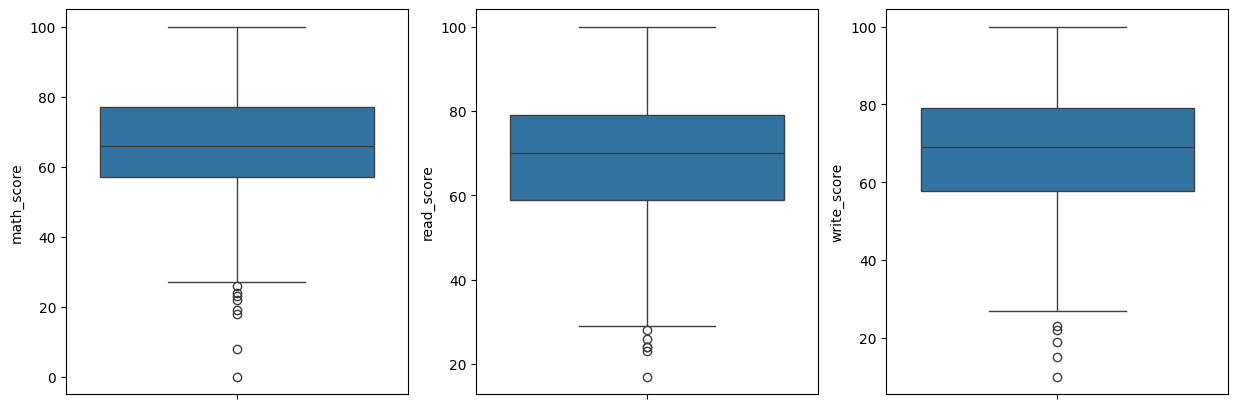

In [57]:
fig,ax=plt.subplots(1,3,figsize=(15,5))
sns.boxplot(data=data,y='math_score',ax=ax[0])
sns.boxplot(data=data,y='read_score',ax=ax[1])
sns.boxplot(data=data,y='write_score',ax=ax[2])

<Axes: xlabel='write_score', ylabel='Count'>

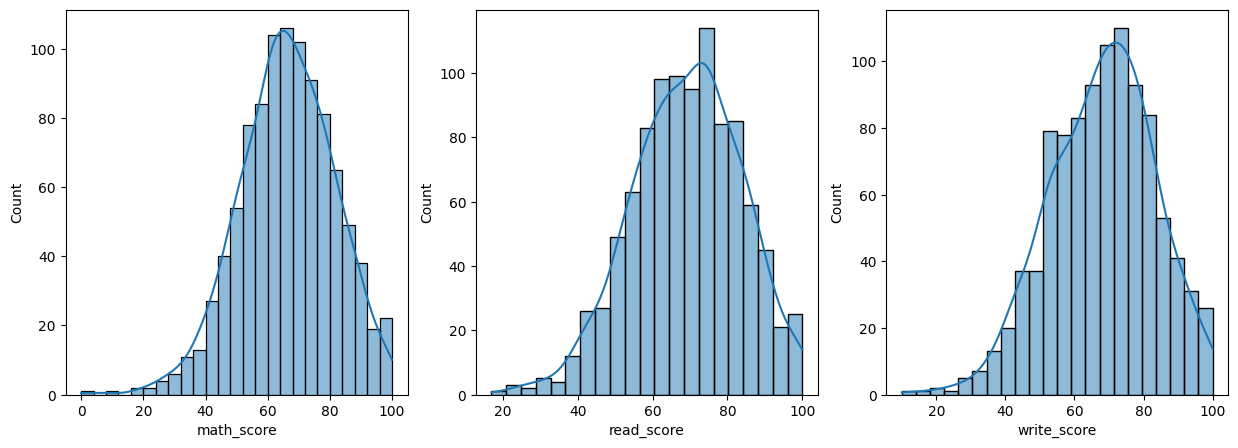

In [59]:
fig,ax=plt.subplots(1,3,figsize=(15,5))
sns.histplot(data=data,x='math_score',ax=ax[0],kde=True)
sns.histplot(data=data,x='read_score',ax=ax[1],kde=True)
sns.histplot(data=data,x='write_score',ax=ax[2],kde=True)

In [63]:
def rem_out(feature):
    global data
    q3,q1=np.percentile(data[feature],[75,25])
    iqr=q3-q1
    data=data[(data[feature]<=q3+1.5*iqr)&(data[feature]>=q1-1.5*iqr)]

In [65]:
rem_out('math_score')
rem_out('read_score')
rem_out('write_score')

<Axes: ylabel='write_score'>

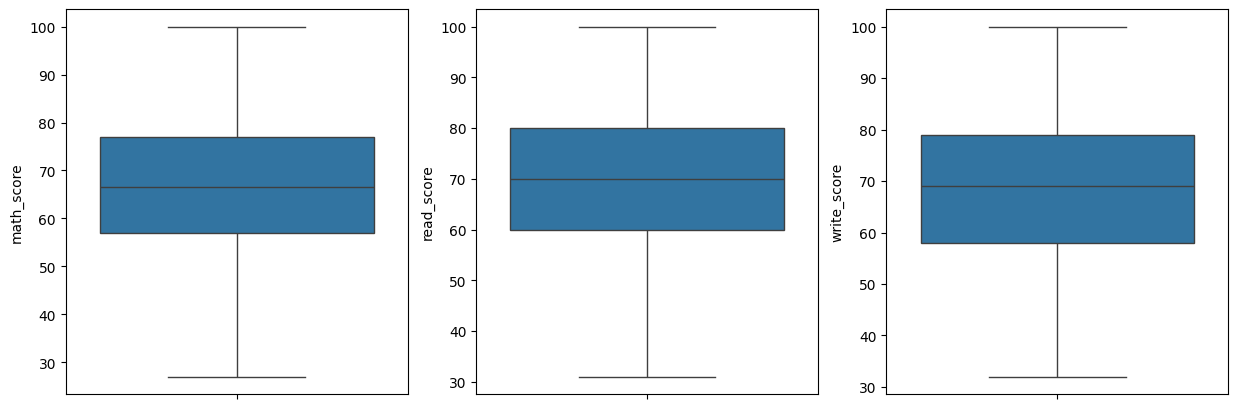

In [67]:
fig,ax=plt.subplots(1,3,figsize=(15,5))
sns.boxplot(data=data,y='math_score',ax=ax[0])
sns.boxplot(data=data,y='read_score',ax=ax[1])
sns.boxplot(data=data,y='write_score',ax=ax[2])

<Axes: xlabel='write_score', ylabel='Count'>

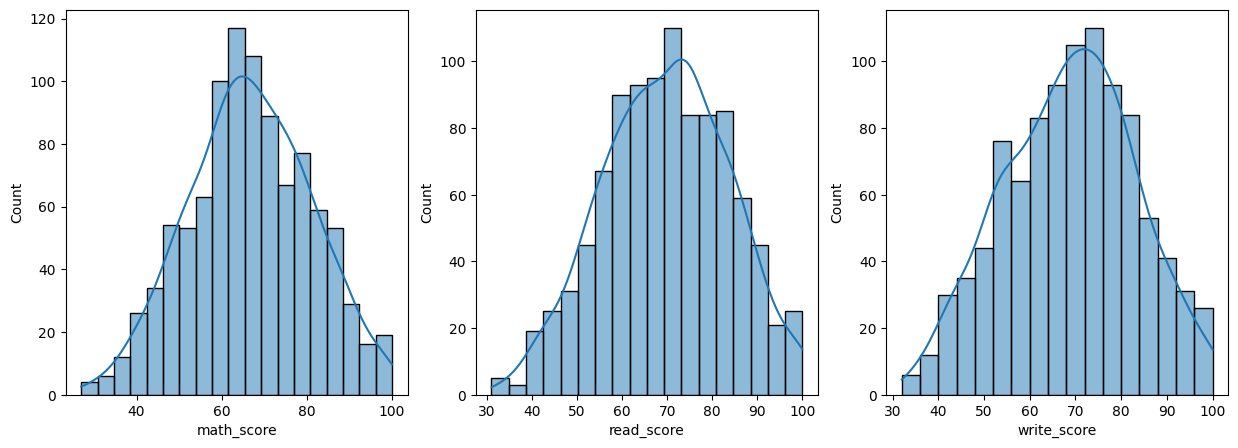

In [69]:
fig,ax=plt.subplots(1,3,figsize=(15,5))
sns.histplot(data=data,x='math_score',ax=ax[0],kde=True)
sns.histplot(data=data,x='read_score',ax=ax[1],kde=True)
sns.histplot(data=data,x='write_score',ax=ax[2],kde=True)

In [73]:
scaler=MinMaxScaler()
data['math_score']=scaler.fit_transform(data[['math_score']])
data['read_score']=scaler.fit_transform(data[['read_score']])
data['write_score']=scaler.fit_transform(data[['write_score']])

<Axes: ylabel='write_score'>

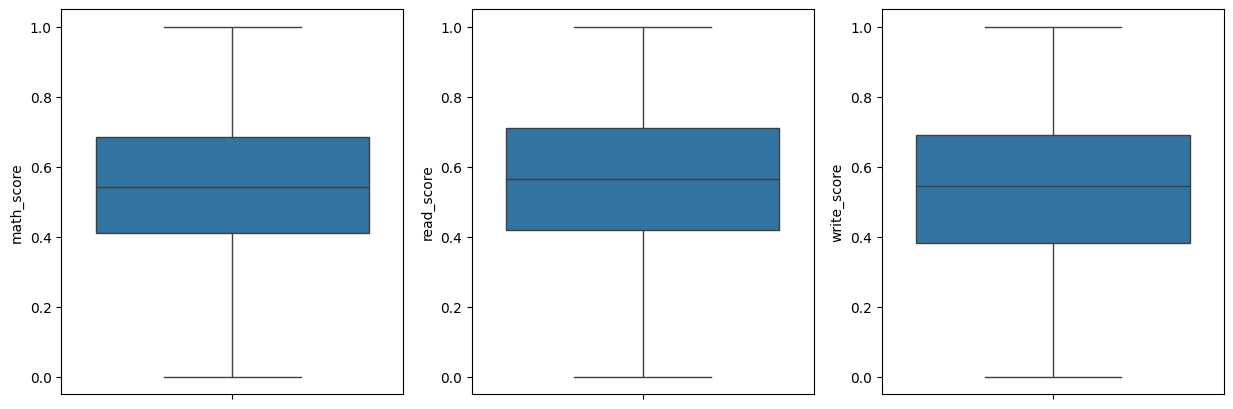

In [75]:
fig,ax=plt.subplots(1,3,figsize=(15,5))
sns.boxplot(data=data,y='math_score',ax=ax[0])
sns.boxplot(data=data,y='read_score',ax=ax[1])
sns.boxplot(data=data,y='write_score',ax=ax[2])

<Axes: xlabel='write_score', ylabel='Count'>

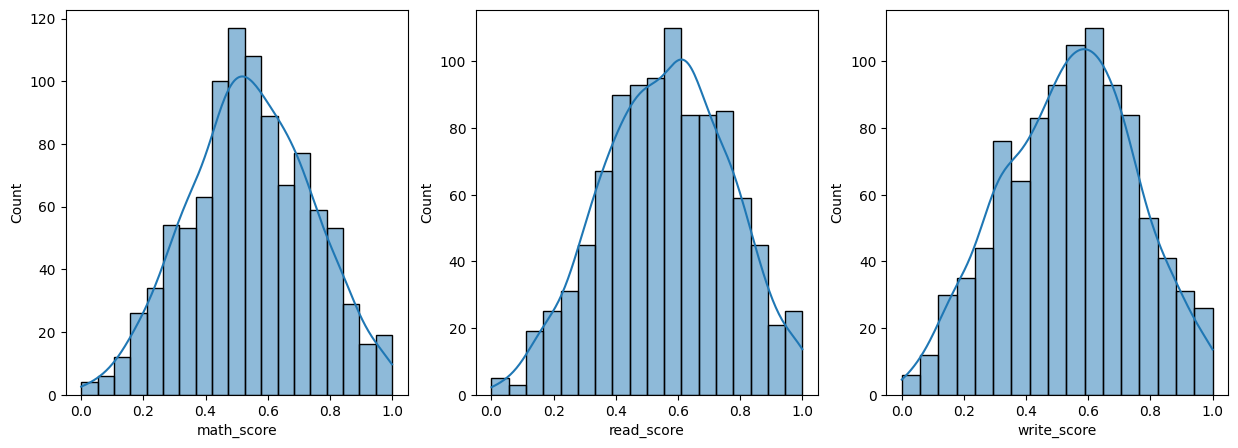

In [77]:
fig,ax=plt.subplots(1,3,figsize=(15,5))
sns.histplot(data=data,x='math_score',ax=ax[0],kde=True)
sns.histplot(data=data,x='read_score',ax=ax[1],kde=True)
sns.histplot(data=data,x='write_score',ax=ax[2],kde=True)